In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import blimpy as bl
import pandas as pd
from astropy import units as u

import sys, os, glob, errno
import csv
import json
import h5py
import time

from scipy.signal import butter, lfilter, filtfilt
import scipy.signal


sys.path.insert(0, "/home/bryanb/setigen/")
import setigen as stg

In [3]:
300/16

18.75

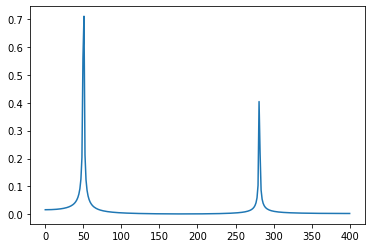

In [13]:
import scipy.fftpack

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(280.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

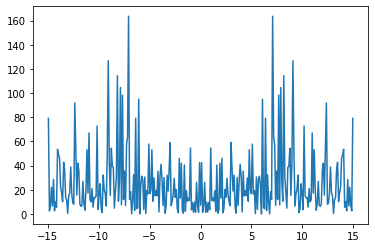

In [29]:
data = np.random.rand(301) - 0.5
ps = np.abs(np.fft.fft(data))**2

time_step = 1 / 30
freqs = np.fft.fftfreq(data.size, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])
plt.show()

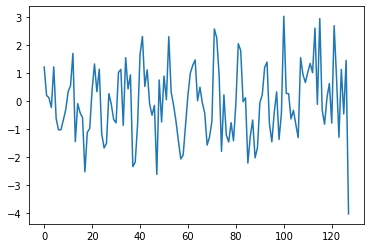

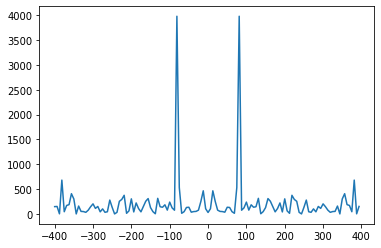

In [35]:
N = 2**7
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.random.normal(0, 1, size=N) + np.sin(80.0 * 2.0*np.pi*x)

ps = np.abs(np.fft.fft(y))**2

freqs = np.fft.fftfreq(y.size, T)
idx = np.argsort(freqs)

plt.plot(y)
plt.show()

plt.plot(freqs[idx], ps[idx])
plt.show()

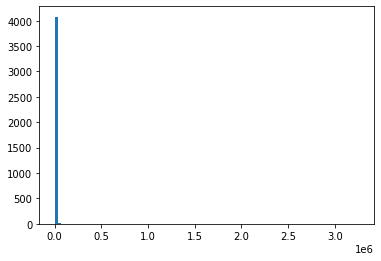

In [33]:
plt.hist(ps, bins=100)
plt.show()

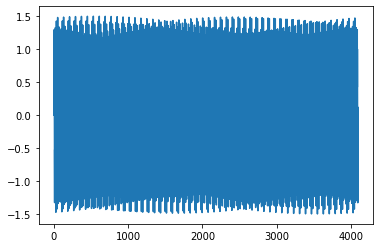

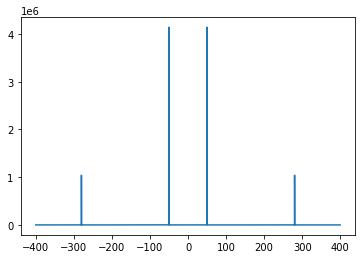

In [44]:
# Number of samplepoints
N = 2**12
# sample spacing
T = 1.0 / 800.0

x = np.linspace(0.0, N*T, N)

y = np.zeros(N)

for df in range(4):
    y += np.random.normal(0, 1, size=N)
    
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(280.0 * 2.0*np.pi*x)
ps = np.abs(np.fft.fft(y))**2

freqs = np.fft.fftfreq(y.size, T)
idx = np.argsort(freqs)

plt.plot(y)
plt.show()

plt.plot(freqs[idx], ps[idx])
plt.show()

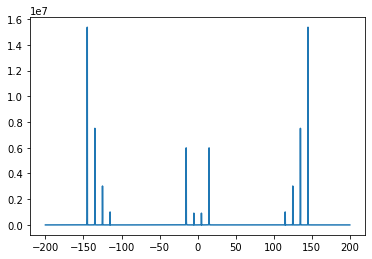

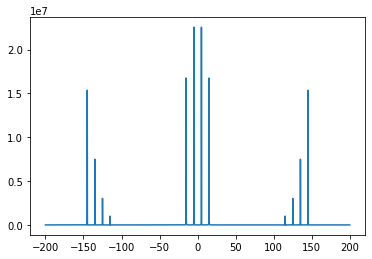

In [48]:
# Number of samplepoints
N = 2**12
# sample spacing
T = 1.0 / 400.0

x = np.linspace(0.0, N*T, N)

# y = np.random.normal(0, 1, size=N)
    

y = np.sin(50 * 2*np.pi*x)
y += 2*np.sin(60 * 2*np.pi*x)
y += 3*np.sin(70 * 2*np.pi*x)
y += 4*np.sin(80 * 2*np.pi*x)

# y = np.exp(1j * 2*np.pi*50*x)

y1 = y * np.exp(1j * 2*np.pi*x*-65)/2 + y * np.exp(1j * 2*np.pi*x*65)/2
ps1 = np.abs(np.fft.fft(y1))**2

y2 = y * np.exp(1j * 2*np.pi*x*-65)/2*1j + y * np.exp(1j * 2*np.pi*x*65)/2*-1j
ps2 = np.abs(np.fft.fft(y2))**2

freqs = np.fft.fftfreq(y.size, T)
idx = np.argsort(freqs)

# plt.plot(y)
# plt.show()

plt.plot(freqs[idx], ps1[idx])
plt.show()

plt.plot(freqs[idx], ps2[idx])
plt.show()

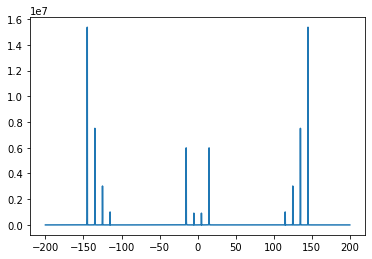

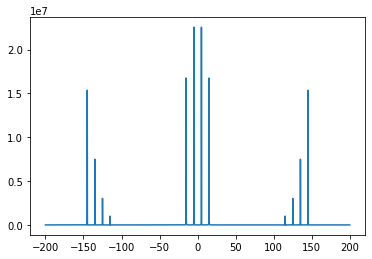

In [52]:
# Number of samplepoints
N = 2**12
# sample spacing
T = 1.0 / 400.0

x = np.linspace(0.0, N*T, N)

# y = np.random.normal(0, 1, size=N)
    

y = np.sin(50 * 2*np.pi*x)
y += 2*np.sin(60 * 2*np.pi*x)
y += 3*np.sin(70 * 2*np.pi*x)
y += 4*np.sin(80 * 2*np.pi*x)

# y = np.exp(1j * 2*np.pi*50*x)

y1 = y * np.cos(2*np.pi*65*x)
ps1 = np.abs(np.fft.fft(y1))**2

y2 = y * np.sin(2*np.pi*65*x)
ps2 = np.abs(np.fft.fft(y2))**2

freqs = np.fft.fftfreq(y.size, T)
idx = np.argsort(freqs)

# plt.plot(y)
# plt.show()

plt.plot(freqs[idx], ps1[idx])
plt.show()

plt.plot(freqs[idx], ps2[idx])
plt.show()

In [54]:
np.fft.fft(y1)

array([16.42980919+0.j        , 16.43211587-0.08965447j,
       16.43904465-0.17957792j, ..., 16.4506219 +0.27004143j,
       16.43904465+0.17957792j, 16.43211587+0.08965447j])

In [50]:
np.fft.fft(y1) - 1j*np.fft.fft(y2)

array([16.42980919-23.72610649j, 17.02120247-23.82722208j,
       17.61833863-23.95158279j, ..., 14.67887064-23.55953922j,
       15.25975067-23.59242696j, 15.84302926-23.64791314j])

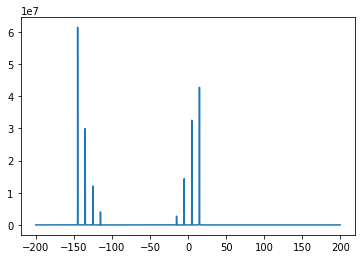

In [51]:
plt.plot(freqs[idx], (np.abs(np.fft.fft(y1) - 1j*np.fft.fft(y2))**2)[idx])
plt.show()

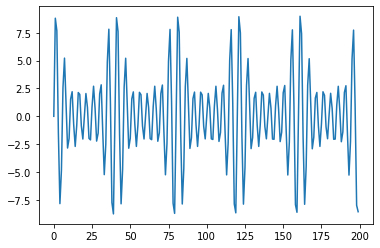

In [62]:
plt.plot(y[:200])

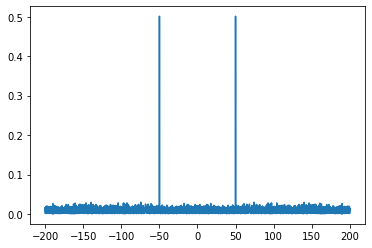

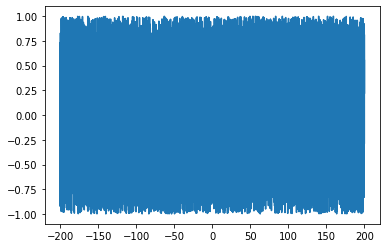

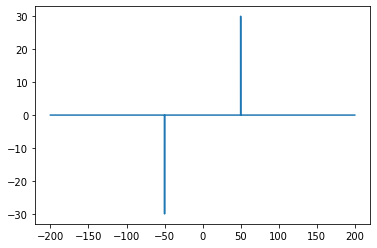

In [59]:
# Number of samplepoints
N = 10000
# sample spacing
T = 1.0 / 400.0

x = np.linspace(0.0, N*T, N, endpoint=False)

# y = np.random.normal(0, 1, size=N)
    


y = np.cos((50.0) * 2*np.pi*x + np.pi/6) + np.random.normal(0, 1, size=N)

# y = np.exp(1j * 2*np.pi*50*x)

fft = np.fft.fft(y)/N
ps = np.abs(fft)**1

# y2 = y * np.sin(2*np.pi*65*x)
# ps2 = np.abs(np.fft.fft(y2))**2

freqs = np.fft.fftfreq(y.size, T)
idx = np.argsort(freqs)

# plt.plot(y)
# plt.show()

plt.plot(freqs[idx], ps[idx])
plt.show()

phase = np.angle(fft)
plt.plot(freqs[idx], phase[idx]/np.pi)
plt.show()

fft2 = np.copy(fft)
threshold = np.max(np.abs(fft))/10
fft2[abs(fft)<threshold] = 0

phase2 = np.angle(fft2)
plt.plot(freqs[idx], phase2[idx]/np.pi*180)
plt.show()

In [60]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx

f, i = find_nearest(freqs[idx], 50.0)
print(f, i)

phase[idx][i]/np.pi

50.0 6250


0.16631195358542689

In [ ]:
phase[idx]

In [77]:
np.where(freqs == 50)

(array([512]),)

In [18]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx

find_nearest(freqs[idx], 50.0)

(50.0, 6250)

In [63]:
freqs[idx][2560]

50.0

In [19]:
np.angle(fft[idx][6250])/np.pi

0.16666666666674354

In [71]:
np.imag(fft[2560])

0.15186247024030308

In [72]:
idx

array([2048, 2049, 2050, ..., 2045, 2046, 2047])

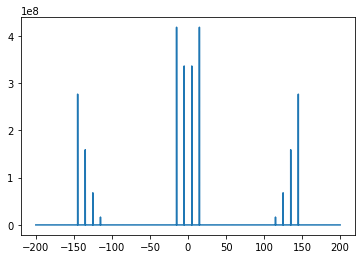

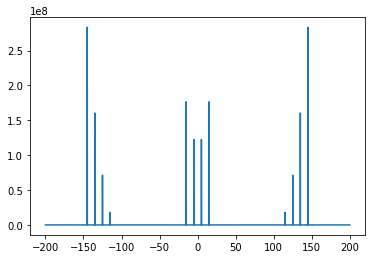

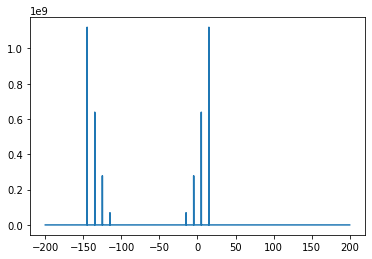

In [170]:
# Number of samplepoints
N = 5*6*7*8*10
# sample spacing
fs = 400
dt = 1.0 / fs

x = np.linspace(0.0, N*dt, N, endpoint=False)

# y = np.random.normal(0, 1, size=N)
    

y = np.cos(50 * 2*np.pi*x + np.pi/6)
y += 2*np.cos(60 * 2*np.pi*x)
y += 3*np.cos(70 * 2*np.pi*x + np.pi/3)
y += 4*np.cos(80 * 2*np.pi*x)
y += np.random.normal(0, 1, N) 

# y = np.exp(1j * 2*np.pi*50*x)

y1 = y * np.cos(2*np.pi*65*x)
ps1 = np.abs(np.fft.fft(y1))**2

y2 = y * np.sin(2*np.pi*65*x)
ps2 = np.abs(np.fft.fft(y2))**2

freqs = np.fft.fftfreq(y.size, dt)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps1[idx])
plt.show()

plt.plot(freqs[idx], ps2[idx])
plt.show()

IQ = y1 - 1j*y2

fftIQ = np.fft.fft(IQ)
ps = np.abs(fftIQ)**2

plt.plot(freqs[idx], ps[idx])
plt.show()

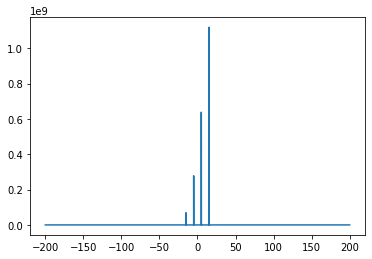

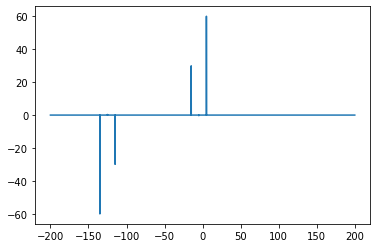

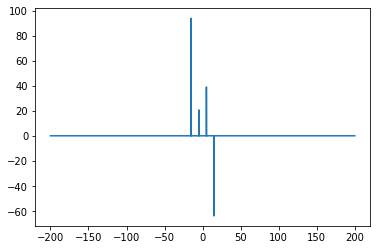

In [171]:
from scipy.signal import butter, lfilter, filtfilt

def butter_lowpass_filter(data, cutOff, fs, order=4):
    nyq = 0.5 * fs
    normalCutoff = cutOff / nyq
    b, a = butter(order, normalCutoff, btype='low', analog=False)
    y = lfilter(b, a, data)
#     y = filtfilt(b, a, data)
    return y

# Filter requirements.
order = 6
# fs = 30.0       # sample rate, Hz
cutoff = 50  # desired cutoff frequency of the filter, Hz

y1l = butter_lowpass_filter(y1, cutoff, fs, order)
y2l = butter_lowpass_filter(y2, cutoff, fs, order)

IQl = y1l - 1j*y2l

fftIQl = np.fft.fft(IQl)
psl = np.abs(fftIQl)**2

plt.plot(freqs[idx], psl[idx])
plt.show()

fft2 = np.copy(fftIQ)
threshold = np.max(np.abs(fftIQ))/5
fft2[abs(fftIQ)<threshold] = 0
plt.plot(freqs[idx], np.angle(fft2[idx])*180/np.pi)
plt.show()

fft2 = np.copy(fftIQl)
threshold = np.max(np.abs(fftIQl))/5
fft2[abs(fftIQl)<threshold] = 0
plt.plot(freqs[idx], np.angle(fft2[idx])*180/np.pi)
plt.show()

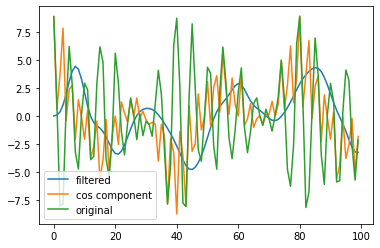

In [172]:
plt.plot(y1l[:100], label='filtered')
plt.plot(y1[:100], label='cos component')
plt.plot(y[:100], label='original')
plt.legend()
plt.show()

In [127]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx

f, i = find_nearest(freqs[idx], 50.0 - 65)
f, i

(-15.0390625, 1894)

In [128]:
np.angle(np.fft.fft(IQ)[idx][i])/np.pi*180, np.angle(np.fft.fft((y1 + 1j*y2))[idx][i])/np.pi*180

(102.06948134894725, 71.96781981182842)

In [129]:
np.angle(np.fft.fft(IQl)[idx][i])/np.pi*180, np.angle(np.fft.fft((y1l + 1j*y2l))[idx][i])/np.pi*180

(165.87731691248808, 135.9254185449035)

In [130]:
np.angle(np.fft.fft(y1)[idx][i])/np.pi*180, np.angle(np.fft.fft(y2)[idx][i])/np.pi*180

(77.8870753497704, -27.20158338024202)

In [131]:
f, i = find_nearest(freqs[idx], 50.0)
np.angle(np.fft.fft(y)[idx][i])/np.pi*180

30.195097887349558

In [132]:
f, i = find_nearest(freqs[idx], 50.0 + 65)
np.angle(np.fft.fft(y1)[idx][i])/np.pi*180, np.angle(np.fft.fft(y2)[idx][i])/np.pi*180

(-41.81106364676571, -132.01013425879958)

In [174]:
2**20

1048576

In [176]:
300/18.25

16.438356164383563

In [177]:
300/1.07

280.3738317757009

In [178]:
300/349.53e-6

858295.4252853831

In [20]:
N*dt

0.0003495253333333333

In [21]:
18.25/(N*dt)

52213.66882324219

In [27]:
5*60 * 3e9 / 16 / N / 51 / 512

2.054388032240026

In [33]:
1744830464/2**20 / 8/8

26.0

In [31]:
13312 / 8, 1703936/1024

(1664.0, 1664.0)

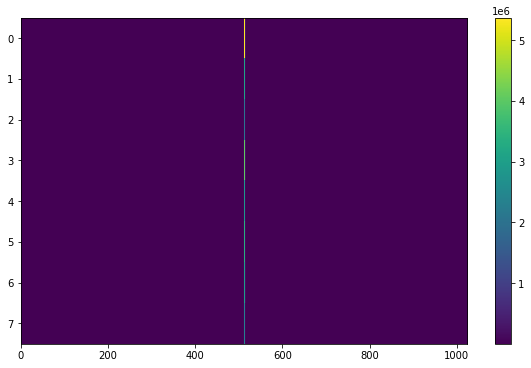

In [3]:
def butter_lowpass_filter(data, cutOff, fs, order=4):
    nyq = 0.5 * fs
    normalCutoff = cutOff / nyq
    b, a = butter(order, normalCutoff, btype='low', analog=False)
    y = lfilter(b, a, data)
#     y = filtfilt(b, a, data)
    return y

# Number of sample points
tchans = 8
N = 2**10 * tchans
# sample spacing
fs = 3e9
dt = 1.0 / fs

x_tot = np.linspace(0.0, N*dt, N, endpoint=False)

# y = np.random.normal(0, 1, size=N)
    
    
final_data = np.zeros((tchans, N // tchans))
for i, x in enumerate(np.reshape(x_tot, (tchans, N // tchans))):

    y = np.cos(5000e6 * 2*np.pi*x + np.pi/6)
    y += 2*np.cos(5001e6 * 2*np.pi*x)
    y += 3*np.cos(5002e6 * 2*np.pi*x + np.pi/3)
    y += 4*np.cos(5003e6 * 2*np.pi*x)
    y += np.random.normal(0, 1, N // tchans) 

    # y = np.exp(1j * 2*np.pi*50*x)

    y1 = y * np.cos(5001.5e6*2*np.pi*x)
    ps1 = np.abs(np.fft.fft(y1))**2

    y2 = y * np.sin(5001.5e6*2*np.pi*x)
    ps2 = np.abs(np.fft.fft(y2))**2

    freqs = np.fft.fftfreq(y.size, dt)
    idx = np.argsort(freqs)

    # plt.plot(freqs[idx], ps1[idx])
    # plt.show()

    # plt.plot(freqs[idx], ps2[idx])
    # plt.show()

    IQ = y1 - 1j*y2

    fftIQ = np.fft.fft(IQ)
    ps = np.abs(fftIQ)**2

    # plt.plot(freqs[idx], ps[idx])
    # plt.xlim(-10e6, 10e6)
    # plt.show()

    # Low-pass filter requirements.
    order = 6
    # fs = 30.0       # sample rate, Hz
    cutoff = 10e6  # desired cutoff frequency of the filter, Hz

    y1l = butter_lowpass_filter(y1, cutoff, fs, order)
    y2l = butter_lowpass_filter(y2, cutoff, fs, order)

    IQl = y1l - 1j*y2l

    fftIQl = np.fft.fft(IQl)
    psl = np.abs(fftIQl)**2

    # plt.plot(freqs[idx], psl[idx])
    # plt.xlim(-10e6, 10e6)
    # plt.show()
    
    final_data[i] = psl

fig = plt.figure(figsize=(10, 6))
plt.imshow(final_data[:, idx], aspect='auto', interpolation='none')
plt.colorbar()
plt.show()

In [4]:
freqs

array([       0. ,  2929687.5,  5859375. , ..., -8789062.5, -5859375. ,
       -2929687.5])

In [5]:
x

array([2.38933333e-06, 2.38966667e-06, 2.39000000e-06, ...,
       2.72966667e-06, 2.73000000e-06, 2.73033333e-06])

In [6]:
300/16

18.75

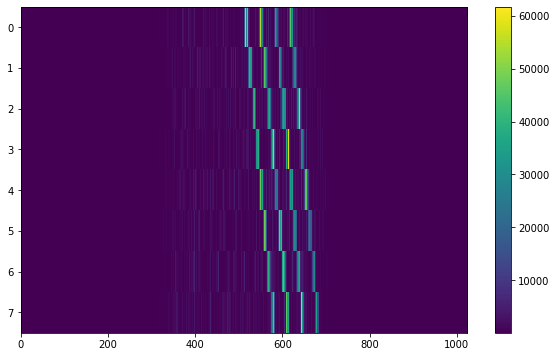

In [7]:
def butter_lowpass_filter(data, cutOff, fs, order=4):
    nyq = 0.5 * fs
    normalCutoff = cutOff / nyq
    b, a = butter(order, normalCutoff, btype='low', analog=False)
    y = lfilter(b, a, data)
#     y = filtfilt(b, a, data)
    return y


def drifting(x):
    df = x/(N*dt)*100e6 
    y = np.cos((5000e6+df) * 2*np.pi*x + np.pi/6)
    y += np.cos((5100e6+df) * 2*np.pi*x)
    y += np.cos((5200e6+df) * 2*np.pi*x + np.pi/3)
    y += np.cos((5300e6+df) * 2*np.pi*x)
    y += np.random.normal(0, 1, N // tchans) 
    
    
    
    return y

# Number of sample points
tchans = 8
N = 2**10 * tchans
# sample spacing
fs = 3e9
dt = 1.0 / fs

x_tot = np.linspace(0.0, N*dt, N, endpoint=False)

# y = np.random.normal(0, 1, size=N)
    
    
final_data = np.zeros((tchans, N // tchans))
for i, x in enumerate(np.reshape(x_tot, (tchans, N // tchans))):

    y = drifting(x)

    # y = np.exp(1j * 2*np.pi*50*x)

    y1 = y * np.cos(5000e6*2*np.pi*x)
    ps1 = np.abs(np.fft.fft(y1))**2

    y2 = y * np.sin(5000e6*2*np.pi*x)
    ps2 = np.abs(np.fft.fft(y2))**2

    freqs = np.fft.fftfreq(y.size, dt)
    idx = np.argsort(freqs)

    # plt.plot(freqs[idx], ps1[idx])
    # plt.show()

    # plt.plot(freqs[idx], ps2[idx])
    # plt.show()

    IQ = y1 - 1j*y2

    fftIQ = np.fft.fft(IQ)
    ps = np.abs(fftIQ)**2

    # plt.plot(freqs[idx], ps[idx])
    # plt.xlim(-10e6, 10e6)
    # plt.show()

    # Low-pass filter requirements.
    order = 6
    # fs = 30.0       # sample rate, Hz
    cutoff = 500e6  # desired cutoff frequency of the filter, Hz

    y1l = butter_lowpass_filter(y1, cutoff, fs, order)
    y2l = butter_lowpass_filter(y2, cutoff, fs, order)

    IQl = y1l - 1j*y2l

    fftIQl = np.fft.fft(IQl)
    psl = np.abs(fftIQl)**2

    # plt.plot(freqs[idx], psl[idx])
    # plt.xlim(-10e6, 10e6)
    # plt.show()
    
    final_data[i] = psl

fig = plt.figure(figsize=(10, 6))
plt.imshow(final_data[:, idx], aspect='auto', interpolation='none')
plt.colorbar()
plt.show()

In [8]:
def signal(t, freq, phase, level):
    """
    t is array of sampled times
    """
    v = level * np.cos(freq * 2*np.pi*t + phase)
    return v

def drifted_signal(t, f_start, phase, drift_rate, level):
    return signal(t, f_start + drift_rate * t, phase, level)

In [ ]:
# Number of sample points
tchans = 8
N = 2**10 * tchans
# sample spacing
fs = 3e9
dt = 1.0 / fs

x_tot = np.linspace(0.0, N*dt, N, endpoint=False)

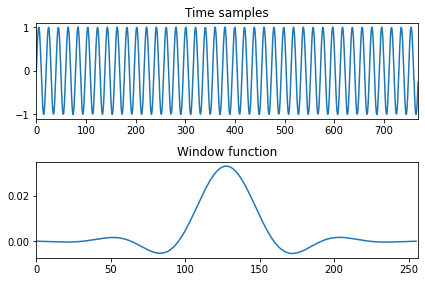

In [12]:
def pfb_fir_frontend(x, win_coeffs, M, P):
    W = int(x.shape[0] / M / P)
    x_p = x.reshape((W*M, P)).T
    h_p = win_coeffs.reshape((M, P)).T
    x_summed = np.zeros((P, M * W - M))
    for t in range(0, M*W-M):
        x_weighted = x_p[:, t:t+M] * h_p
        x_summed[:, t] = x_weighted.sum(axis=1)
    return x_summed.T

def generate_win_coeffs(M, P, window_fn="hamming"):
    win_coeffs = scipy.signal.get_window(window_fn, M*P)
    sinc       = scipy.signal.firwin(M * P, cutoff=1.0/P, window="rectangular")
    win_coeffs *= sinc
    return win_coeffs

M = 8
P = 32

x = np.sin(np.arange(0, M*P*10) / np.pi)
win_coeffs = generate_win_coeffs(M, P, window_fn="hamming")

plt.subplot(2,1,1)
plt.title("Time samples")
plt.plot(x)
plt.xlim(0, M*P*3)

plt.subplot(2,1,2)
plt.title("Window function")
plt.plot(win_coeffs)
plt.xlim(0, M*P)

plt.tight_layout(pad=1.0)
plt.show()

In [13]:

y_p = pfb_fir_frontend(x, win_coeffs, M, P)

print("n_taps: %i" % M)
print("n_branches: %i" % P)
print("Input signal shape: %i" % x.shape)
print("Window shape:       %i" % win_coeffs.shape)
print("Output data shape: %s" % str(y_p.shape))

n_taps: 8
n_branches: 32
Input signal shape: 2560
Window shape:       256
Output data shape: (72, 32)


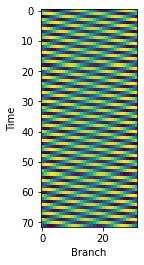

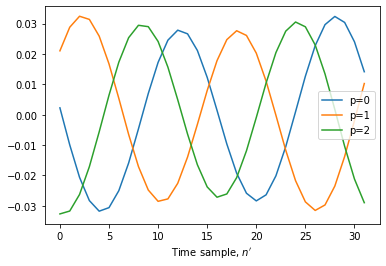

In [14]:
plt.figure()
plt.imshow(y_p)
plt.xlabel("Branch")
plt.ylabel("Time")

plt.figure()
plt.plot(y_p[0], label="p=0")
plt.plot(y_p[1], label="p=1")
plt.plot(y_p[2], label="p=2")
plt.xlabel("Time sample, $n'$")
plt.legend()
plt.show()

In [113]:
def fft(x_p, P, axis=1):
    return np.fft.rfft(x_p, P, axis=axis)

def pfb_filterbank(x, win_coeffs, M, P):
    x_fir = pfb_fir_frontend(x, win_coeffs, M, P)
    x_pfb = fft(x_fir, P)
    return x_pfb

def voltage_output(x, n_taps, n_chan, window_fn="hamming"):
    M = n_taps
    P = n_chan
    
    # Generate window coefficients
    win_coeffs = generate_win_coeffs(M, P, window_fn)

    # Apply frontend, take FFT, then take power (i.e. square)
    x_fir = pfb_fir_frontend(x, win_coeffs, M, P)
    x_pfb = np.fft.rfft(x_fir, P, axis=1)
    return x_pfb

def pfb_spectrometer(x, n_taps, n_chan, n_int, window_fn="hamming"):
    M = n_taps
    P = n_chan
    
    # Generate window coefficients
    win_coeffs = generate_win_coeffs(M, P, window_fn)

    # Apply frontend, take FFT, then take power (i.e. square)
    x_fir = pfb_fir_frontend(x, win_coeffs, M, P)
    x_pfb = np.fft.rfft(x_fir, P, axis=1)
    
    x_psd = np.abs(x_pfb)**2
    
    # Trim array so we can do time integration
    x_psd = x_psd[:np.round(x_psd.shape[0]//n_int)*n_int]
    
    # Integrate over time, by reshaping and summing over axis (efficient)
    x_psd = x_psd.reshape(x_psd.shape[0]//n_int, n_int, x_psd.shape[1])
    x_psd = x_psd.mean(axis=1)
    
    return x_psd

In [16]:
M     = 4          # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 1000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data

# Generate a test data steam
samples = np.arange(M*P*W)
noise   = np.random.normal(loc=0.5, scale=0.1, size=M*P*W) 
freq = 1
amp  = 0.02
cw_signal = amp * np.sin(samples * freq)
data = noise + cw_signal

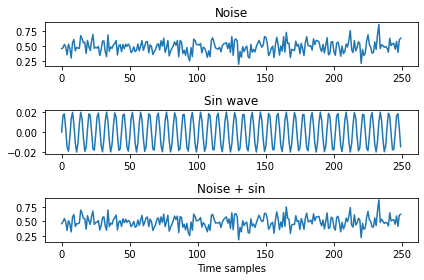

In [17]:
plt.subplot(3,1,1)
plt.title("Noise")
plt.plot(noise[:250])
plt.subplot(3,1,2)
plt.title("Sin wave")
plt.plot(cw_signal[:250])
plt.subplot(3,1,3)
plt.title("Noise + sin")
plt.plot(data[:250])
plt.xlabel("Time samples")
plt.tight_layout()
plt.show()

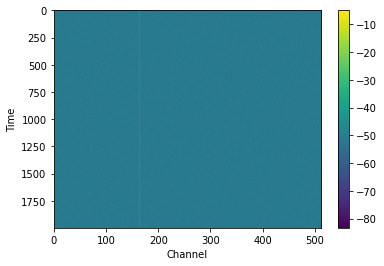

In [18]:
def db(x):
    """ Convert linear value to dB value """
    return 10*np.log10(x)

X_psd = pfb_spectrometer(data, n_taps=M, n_chan=P, n_int=2, window_fn="hamming")

plt.imshow(db(X_psd), cmap='viridis', aspect='auto')
plt.colorbar()
plt.xlabel("Channel")
plt.ylabel("Time")
plt.show()

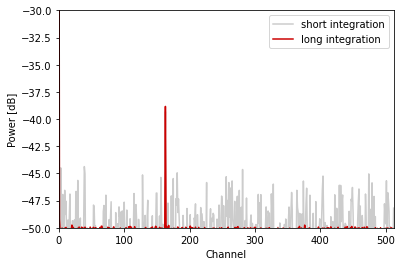

In [19]:
X_psd2 = pfb_spectrometer(data, n_taps=M, n_chan=P, n_int=1000, window_fn="hamming")

plt.plot(db(X_psd[0]), c='#cccccc', label='short integration')
plt.plot(db(X_psd2[1]), c='#cc0000', label='long integration')
plt.ylim(-50, -30)
plt.xlim(0, P/2)
plt.xlabel("Channel")
plt.ylabel("Power [dB]")
plt.legend()
plt.show()

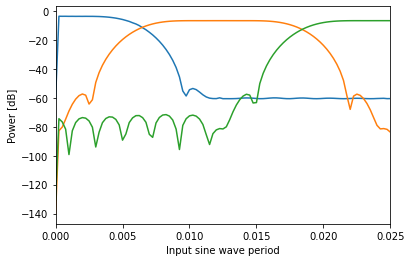

In [20]:
M, P, W = 6, 512, 256                   # taps, channels, windows
period = np.linspace(0, 0.025, 101)

chan0_val = []
chan1_val = []
chan2_val = []
for p in period:
    t = np.arange(0, M*P*W)
    x = np.sin(t * p) + 0.001
    X_psd = pfb_spectrometer(x, n_taps=M, n_chan=P, n_int=256, window_fn="hamming")
    chan0_val.append(X_psd[0, 0])
    chan1_val.append(X_psd[0, 1])
    chan2_val.append(X_psd[0, 2])
    
    
plt.plot(period, db(chan0_val))
plt.plot(period, db(chan1_val))
plt.plot(period, db(chan2_val))
plt.xlim(period[0], period[-1])
plt.ylabel("Power [dB]")
plt.xlabel("Input sine wave period")
plt.show()

In [41]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 1000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9
T = 1.0 / sample_rate

# Generate a test data steam
N = M * P * W
# samples = np.arange(M*P*W)
samples = np.linspace(0.0, N * T, N, endpoint=False)
noise   = np.random.normal(loc=0.5, scale=0.1, size=M*P*W) 
freq = 0.6e9
amp  = 0.02
cw_signal = amp * np.cos(2 * np.pi * samples * freq)
data = noise + cw_signal

In [22]:
N

8192000

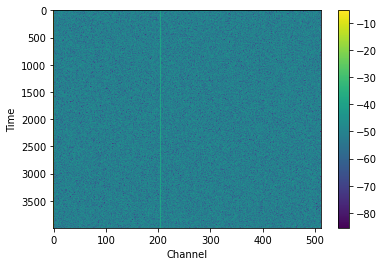

In [23]:
X_psd = pfb_spectrometer(data, n_taps=M, n_chan=P, n_int=n_int, window_fn="hamming")

plt.imshow(db(X_psd), cmap='viridis', aspect='auto', interpolation='none')
plt.colorbar()
plt.xlabel("Channel")
plt.ylabel("Time")
plt.show()

In [24]:
X_v = voltage_output(data, n_taps=M, n_chan=P, window_fn="hamming")

In [25]:
X_samples = X_v[:, 200]
X_samples

array([-1.13926255e-05+2.48879227e-03j, -6.39738188e-04-1.16157342e-05j,
       -7.47682773e-04+3.70994103e-04j, ...,
        8.90475340e-04+4.22006321e-05j,  1.92045045e-04-2.75978660e-04j,
       -6.49400882e-04-1.18893390e-04j])

In [26]:
X_samples.shape

(7992,)

In [27]:
fftlength = 1024
X_samples = X_samples[:np.round(X_samples.shape[0]//fftlength)*fftlength]
X_samples = X_samples.reshape(X_samples.shape[0]//fftlength, fftlength)

XX = np.fft.fft(X_samples, axis=1)
print(XX.shape)

(7, 1024)


In [28]:
XX_psd = np.abs(XX)**2
XX_psd.shape

(7, 1024)

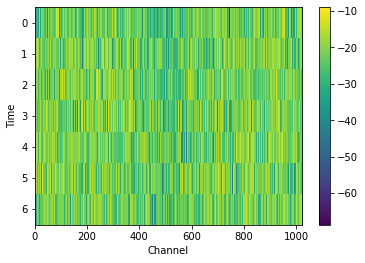

In [29]:
plt.imshow(db(XX_psd), cmap='viridis', aspect='auto', interpolation='none')
plt.colorbar()
plt.xlabel("Channel")
plt.ylabel("Time")
plt.show()

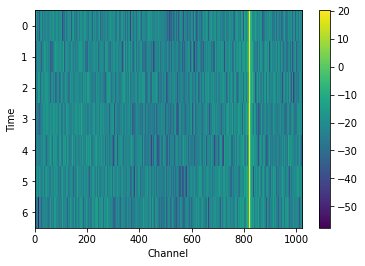

In [30]:
fftlength = 1024
X_samples = X_v[:, 205]
X_samples = X_samples[:np.round(X_samples.shape[0]//fftlength)*fftlength]
X_samples = X_samples.reshape(X_samples.shape[0]//fftlength, fftlength)

XX = np.fft.fft(X_samples, P, axis=1)
XX_psd = np.abs(XX)**2

plt.imshow(db(XX_psd), cmap='viridis', aspect='auto', interpolation='none')
plt.colorbar()
plt.xlabel("Channel")
plt.ylabel("Time")
plt.show()

In [118]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 1000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9
T = 1.0 / sample_rate

# Generate a test data steam
N = M * P * W
# samples = np.arange(M*P*W)
samples = np.linspace(0.0, N * T, N, endpoint=False)
noise   = np.random.normal(loc=0.5, scale=1, size=M*P*W) 
freq = 0.6e9
amp  = 0.02
cw_signal = amp * np.cos(2 * np.pi * samples * freq)
data = noise + cw_signal + 100

0.0001281742271531007
0.49986381963571563
0.0005125688884148667


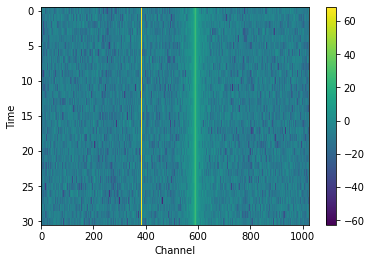

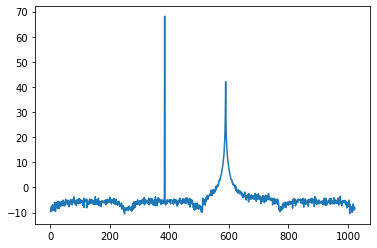

In [160]:
def voltage_output(x, n_taps, n_chan, window_fn="hamming"):
    M = n_taps
    P = n_chan
    
    # Generate window coefficients
    win_coeffs = generate_win_coeffs(M, P, window_fn)
    print(np.mean(win_coeffs))

    # Apply frontend, take FFT, then take power (i.e. square)
    print(np.mean(x))
    x_fir = pfb_fir_frontend(x, win_coeffs, M, P)
    print(np.mean(x_fir))
    x_pfb = np.fft.rfft(x_fir, P, axis=1)
    return x_pfb



M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 1000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9
T = 1.0 / sample_rate

# Generate a test data steam
N = M * P * W
# samples = np.arange(M*P*W)
samples = np.linspace(0.0, N * T, N, endpoint=False)
noise   = np.random.normal(loc=0.5, scale=1, size=M*P*W) 
freq = 0.6e9
amp  = 0.01 + 1
cw_signal = amp * np.cos(2 * np.pi * samples * freq)
data = noise + cw_signal




fftlength = 256
start_channel = 203
num_channels = 4

X_v = voltage_output(data, n_taps=M, n_chan=P, window_fn="hamming")
# print(X_v[0][1])
X_v[:, 204] += 10

X_samples = X_v[:, start_channel:(start_channel + num_channels)]
X_samples = X_samples.T
X_samples = X_samples[:, :np.round(X_samples.shape[1]//fftlength)*fftlength]
X_samples = X_samples.reshape((num_channels, X_samples.shape[1]//fftlength, fftlength))

XX = np.fft.fft(X_samples, fftlength, axis=2)
XX = np.fft.fftshift(XX, axes=2)
XX_psd = np.abs(XX)**2

XX_psd = np.concatenate(XX_psd, axis=1)


plt.imshow(db(XX_psd), cmap='viridis', aspect='auto', interpolation='none')
plt.colorbar()
plt.xlabel("Channel")
plt.ylabel("Time")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

In [166]:
a = np.real(X_v[:, 203][0])
a, type(np.real(X_v[:, 203][0]))

(-0.012144025250929148, numpy.float64)

In [170]:
a.astype(np.float16)

-0.012146

In [154]:
np.mean(np.real(X_v[:, 203])), np.mean(np.imag(X_v[:, 203]))

(-0.0001870738249838644, -4.2681839098324616e-05)

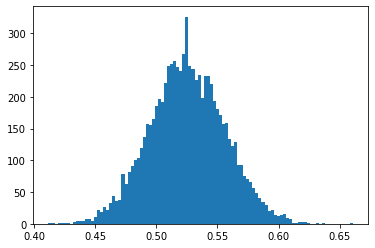

In [174]:
plt.hist(np.real(X_v[:, 0]), bins=100)
plt.show()

In [155]:
np.mean(np.real(X_v[:, 204])), np.mean(np.imag(X_v[:, 204]))

(0.00014516989699566747, 7.181767164023543e-05)

In [156]:
np.mean(np.real(X_v[:, 205])), np.mean(np.imag(X_v[:, 205]))

(-0.0001662058705007436, 3.2932525100141966e-05)

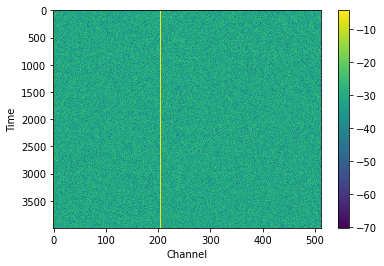

In [148]:
X_psd = pfb_spectrometer(data, n_taps=M, n_chan=P, n_int=n_int, window_fn="hamming")

plt.imshow(db(X_psd), cmap='viridis', aspect='auto', interpolation='none')
plt.colorbar()
plt.xlabel("Channel")
plt.ylabel("Time")
plt.show()

In [141]:
print((X_v[0][1]))
print((X_v[0][1].real))

(-0.020358884478192663-0.009348344867499192j)
-0.020358884478192663


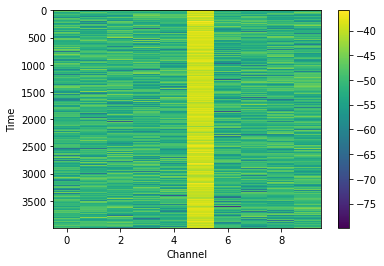

In [136]:
X_psd = pfb_spectrometer(data, n_taps=M, n_chan=P, n_int=n_int, window_fn="hamming")

plt.imshow(db(X_psd[:, 200:210]), cmap='viridis', aspect='auto', interpolation='none')
plt.colorbar()
plt.xlabel("Channel")
plt.ylabel("Time")
plt.show()

In [138]:
3e9 * 300 # number of samples

900000000000.0

In [146]:
3e9 * 300 / 1024 - 32 # total y length after polyphase

878906218.0

In [149]:
(3e9 * 300 / 1024 - 32) / 2**20 / 51


16.435103659536324

In [ ]:
M = 32
P = 1024
i think

In [143]:
32*1024

32768

In [152]:
16/16.435*300/16

18.253726802555523

In [110]:
scipy.fft

<module 'scipy.fft' from '/datax/scratch/bbrzycki/miniconda3/envs/bl_tf/lib/python3.8/site-packages/scipy/fft/__init__.py'>